In [145]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [164]:
#group by city
#averagefare = fare.mean() by city
#ridecount = ride_id.count() by city

pyber_df = combined_data.groupby(["city"])
numberofrides = pyber_df["ride_id"].count()
avgfare = pyber_df["fare"].mean()
drivers = pyber_df["driver_count"].max()
citytype = pyber_df["type"]

pybersummary_df = pd.DataFrame({"Driver count": drivers,"Total Number of Rides": numberofrides, "Average Fare": avgfare})
pybersummary_df

,Driver count,Total Number of Rides,Average Fare
city,,,
Amandaburgh,12,18,24.641667
Barajasview,26,22,25.332273
Barronchester,11,16,36.422500
Bethanyland,22,18,32.956111
Bradshawfurt,7,10,40.064000
Brandonfort,10,19,35.437368
Carriemouth,52,27,28.314444
Christopherfurt,41,27,24.501852
Colemanland,23,22,30.894545


## Bubble Plot of Ride Sharing Data

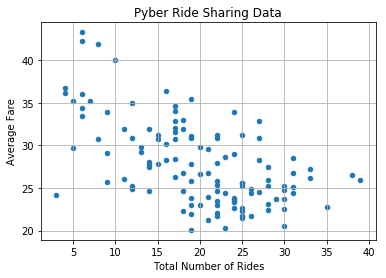

In [165]:
# Obtain the x and y coordinates for each of the three city types
x="Total Number of Rides"
y="Average Fare"
drivercount="Driver Count"

pybersummary_df.plot.scatter(x, y, grid=True, title="Pyber Ride Sharing Data")


# Build the scatter plots for each city types
#type_group.plot(kind="scatter", x="driver_count", y="fare", grid=True, figsize=(20,10),
#              title="Pyber Ride Sharing Data")

# Incorporate the other graph properties

# Create a legend
#plt.legend(handles=[type, city], loc="best")

# Incorporate a text label regarding circle size

# Save Figure
#plt.savefig("../Images/pyber.png")


In [166]:
# Show plot
plt.show()

## Total Fares by City Type

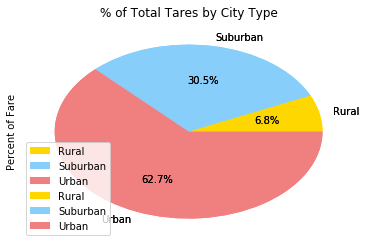

In [189]:
# Calculate Type Percents

pyber_df2 = combined_data.groupby(["type"])
totalfare = pyber_df2["fare"].sum()

pybersummary_df2 = pd.DataFrame({"Fare": totalfare})
pybersummary_df2["Percent of Fare"] = pybersummary_df2['Fare'] / \
    pybersummary_df2['Fare'].sum() * 100


#Build Pie  Chart

x="Total Number of Rides"
y="Average Fare"
drivercount="Driver Count"

type_list = pybersummary_df2.keys()

colors = ["gold", "lightskyblue", "lightcoral"]
pyber_pie = pybersummary_df2.plot(kind="pie", y=type_list, colors=colors, autopct='%1.1f%%', title=("% of Total Tares by City Type"))
plt.show()

# Save Figure


In [178]:
# Show Figure
plt.show()

## Total Rides by City Type

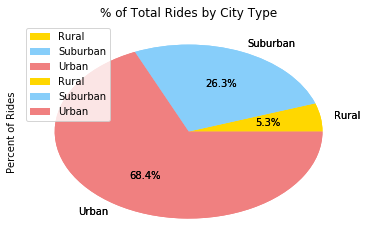

In [188]:
# Calculate Type Percents

pyber_df2 = combined_data.groupby(["type"])
ridecount = pyber_df2["ride_id"].count()

pybersummary_df2 = pd.DataFrame({"Rides": ridecount})
pybersummary_df2["Percent of Rides"] = pybersummary_df2['Rides'] / \
    pybersummary_df2['Rides'].sum() * 100

#Build Pie  Chart

x="Rides"
#y="Average Fare"
#drivercount="Driver Count"

type_list = pybersummary_df2.keys()

colors = ["gold", "lightskyblue", "lightcoral"]
pyber_pie = pybersummary_df2.plot(kind="pie", y=type_list, colors=colors, autopct='%1.1f%%', title=("% of Total Rides by City Type"))
plt.show()

# Save Figure

In [180]:
# Show Figure
plt.show()

## Total Drivers by City Type

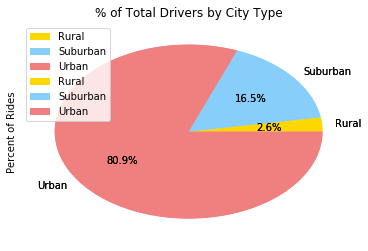

In [187]:
# Calculate Type Percents
extract_df = combined_data.loc[:, ["city","driver_count","type"]]
unique_cities = extract_df.drop_duplicates()

pyber_df2 = unique_cities.groupby(["type"])
drivercount = pyber_df2["driver_count"].sum()

pybersummary_df2 = pd.DataFrame({"Drivers": drivercount})
pybersummary_df2["Percent of Rides"] = pybersummary_df2['Drivers'] / \
    pybersummary_df2['Drivers'].sum() * 100
pybersummary_df2

#Build Pie  Chart

x="Rides"

type_list = pybersummary_df2.keys()

colors = ["gold", "lightskyblue", "lightcoral"]
pyber_pie = pybersummary_df2.plot(kind="pie", y=type_list, colors=colors, autopct='%1.1f%%', title=("% of Total Drivers by City Type"))
plt.show()

# Save Figure

In [182]:
# Show Figure
plt.show()